<a href="https://colab.research.google.com/github/koc90/part_3_teamwork/blob/main/Notebook_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Podział wyjściowego datasetu, na część przeznaczoną do pracy oraz część "tajną", do testów porównawczych


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def print_metadata(df):
  print(df.columns)
  print(df.shape)
  print(df.head())
  print(df.describe())


def plot_corelations(df):
  correlation_matrix = df.corr()
  plt.figure(figsize=(12, 8))
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
  plt.show()


def create_subdf(df, bool_vec):
  subdf = df[bool_vec]
  print(subdf.shape)
  print(subdf.head())
  return subdf


In [ ]:

def create_corr_and_stats_arrays(df):
  df_corr_matrix = df.corr() # macierz korelacji
  df_stats_matrix = df.describe().loc[['mean', 'std']] #statystyki


  df_corr_np_array = np.array(df_corr_matrix) #zamiana DataFrame na np.array - do obliczeń
  df_stats_np_array = np.array(df_stats_matrix)


  return df_corr_np_array, df_stats_np_array




In [ ]:
def error_fun(set1_cor_arr, set1_sta_arr, set2_cor_arr, set2_sta_arr):



  weights = set1_cor_arr[-1, :]

  cor_arr = set1_cor_arr - set2_cor_arr
  sta_arr = set1_sta_arr - set2_sta_arr


  for i, j in enumerate(weights):

    #print(f"i = {i}, j = {j}")

    w = np.abs(j)
    #print(f"w = np.abs(j) = {w}")

    w = np.sqrt(w)
    #print(f"w = np.sqrt(w) = {w}")

    sta_arr[:, i] = sta_arr[:, i]*w #dodanie wag, im większa korelacja pomiędzy "churn" a cechą, tym ważniejsza jest różnica w statystykach danej cechy



  cor_vec = cor_arr.flatten()
  sta_vec = sta_arr.flatten()

  #print(f"cor_vec = {cor_vec}")
  #print(f"sta_vec = {sta_vec}")

  error = np.dot(cor_vec, cor_vec) + np.dot(sta_vec, sta_vec)

  return error


def error_fun1(set1_cor_arr, set1_sta_arr, set2_cor_arr, set2_sta_arr):

  cor_arr = set1_cor_arr - set2_cor_arr
  cor_vec = cor_arr.flatten()

  #print(f"cor_vec = {cor_vec}")
  #print(f"sta_vec = {sta_vec}")

  error = np.dot(cor_vec, cor_vec)

  return error



def error_fun2(set1_cor_arr, set1_sta_arr, set2_cor_arr, set2_sta_arr):



  weights = set1_cor_arr[-1, :]
  sta_arr = set1_sta_arr - set2_sta_arr


  for i, j in enumerate(weights):

    #print(f"i = {i}, j = {j}")

    w = np.abs(j)
    #print(f"w = np.abs(j) = {w}")

    w = np.sqrt(w)
    #print(f"w = np.sqrt(w) = {w}")

    sta_arr[:, i] = sta_arr[:, i]*w #dodanie wag, im większa korelacja pomiędzy "churn" a cechą, tym ważniejsza jest różnica w statystykach danej cechy


  sta_vec = sta_arr.flatten()

  #print(f"cor_vec = {cor_vec}")
  #print(f"sta_vec = {sta_vec}")

  error = np.dot(sta_vec, sta_vec)

  return error



def error_fun3(set1_cor_arr, set1_sta_arr, set2_cor_arr, set2_sta_arr):

  cor_arr = set1_cor_arr - set2_cor_arr
  cor_vec = cor_arr[-1, :]

  #print(cor_vec)



  #print(f"cor_vec = {cor_vec}")
  #print(f"sta_vec = {sta_vec}")

  error = np.dot(cor_vec, cor_vec)

  return error





In [ ]:
def visual_comparison(df1: pd.DataFrame, df2: pd.DataFrame):

  for feature in df.columns:

    plt.figure(figsize=(15, 2))
    plt.subplot(1, 2, 1)
    plt.hist(df1[feature], bins=30, alpha=0.5, color='blue', edgecolor='black')
    plt.xlabel(feature)
    plt.title(f'Dataset_1 {feature}')


    plt.subplot(1, 2, 2)
    plt.hist(df2[feature], bins=30, alpha=0.5, color='green', edgecolor='black')
    plt.xlabel(feature)
    plt.title(f'Dataset_2 {feature}')


  cor_mat_df1 = df1.corr()
  cor_mat_df2 = df2.corr()

  plt.figure(figsize=(20, 5))
  plt.subplot(1, 2, 1)
  sns.heatmap(cor_mat_df1, annot=True, cmap='coolwarm')

  plt.subplot(1, 2, 2)
  sns.heatmap(cor_mat_df2, annot=True, cmap='coolwarm')

  plt.show()

  print(df1.describe())
  print(df2.describe())




In [ ]:
filename = "internet_service_churn.csv"
df = pd.read_csv(filename)
df.columns = ['id', 'is_tv_subscriber', 'is_movie_package_subscriber',
       'subscription_age', 'bill_avg', 'remaining_contract',
       'service_failure_count', 'download_avg', 'upload_avg',
       'download_over_limit', 'churn']
df = df[df.columns[1:]]

In [ ]:
import random

In [ ]:
N = df.shape[0] # liczebność zbioru wyjściowego
print(f"N = {N}")

N = 72274


In [ ]:
n = 10000 #liczebność podzbioru "tajnego"


In [ ]:
secret_samples_idx = random.sample(population = range(N), k=n) #losowanie numerów próbek

secret_samples = df.loc[secret_samples_idx] #tworzenie "tajnego" podzbioru
train_samples = df.drop(secret_samples_idx)

print(secret_samples.head()) #sprawdzenie, czy dobrze zadziałało
print(secret_samples.shape) #powinno być (n, 10)


       is_tv_subscriber  is_movie_package_subscriber  subscription_age  \
54283                 1                            0              1.66   
70175                 1                            0              0.12   
12091                 0                            0              1.54   
9320                  1                            0              2.78   
33029                 1                            0              4.24   

       bill_avg  remaining_contract  service_failure_count  download_avg  \
54283        24                1.95                      3          43.4   
70175        13                1.85                      0          47.1   
12091        74                0.00                      2           0.0   
9320         22                 NaN                      0          52.8   
33029        21                1.82                      0          55.5   

       upload_avg  download_over_limit  churn  
54283         5.5                    0      0  
70

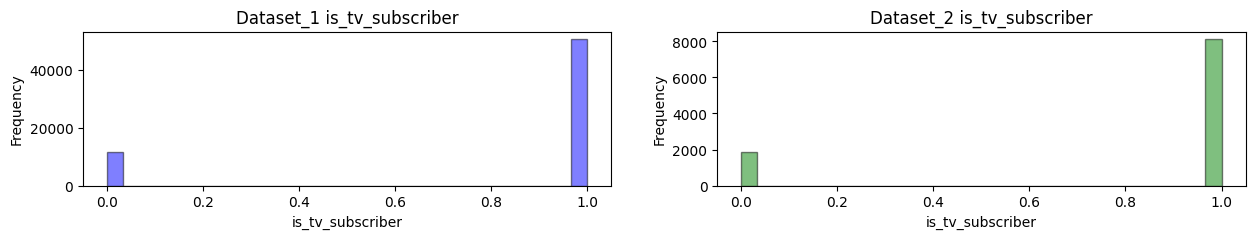

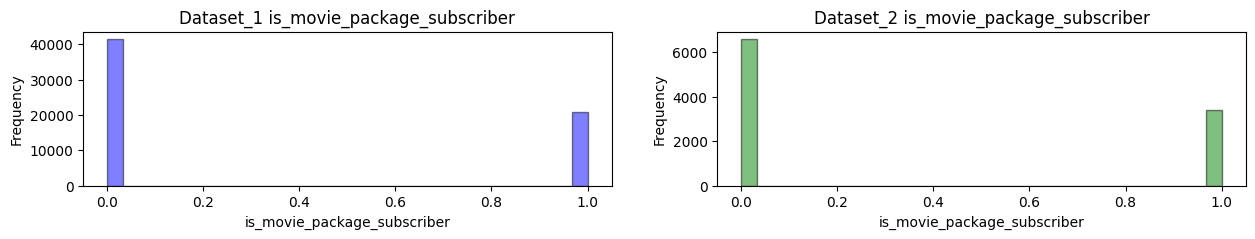

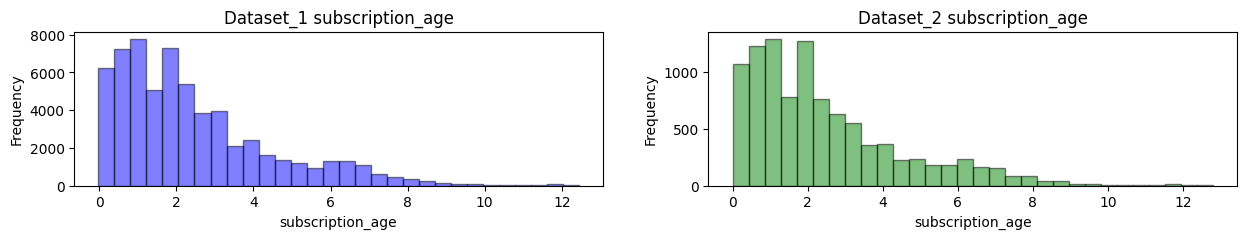

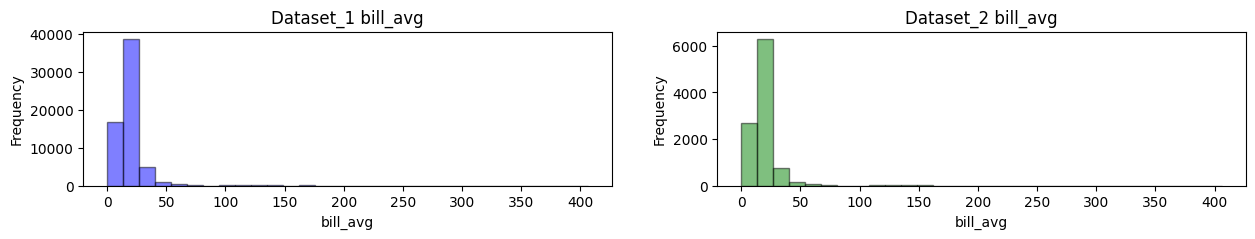

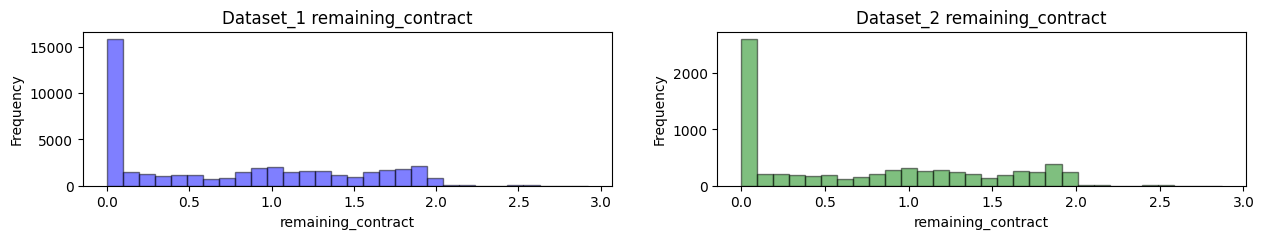

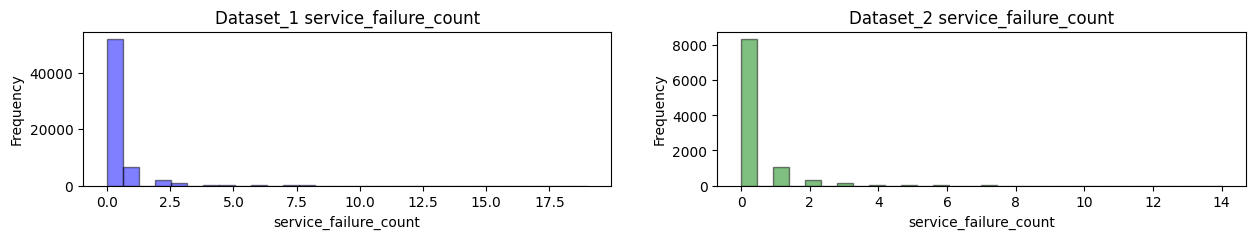

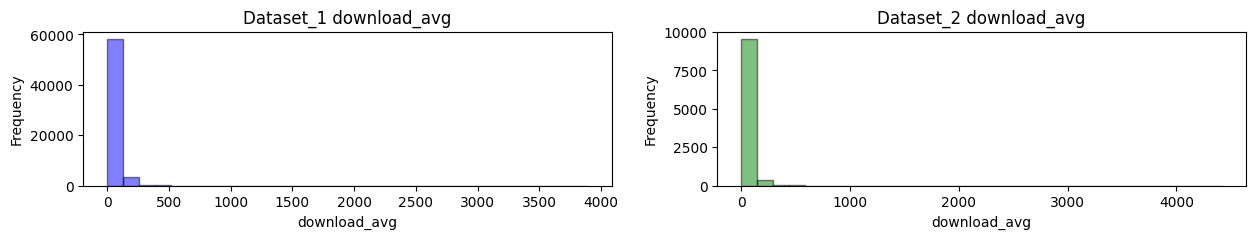

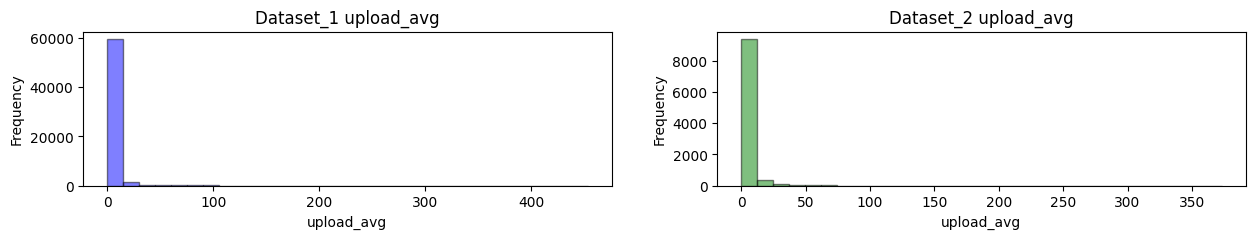

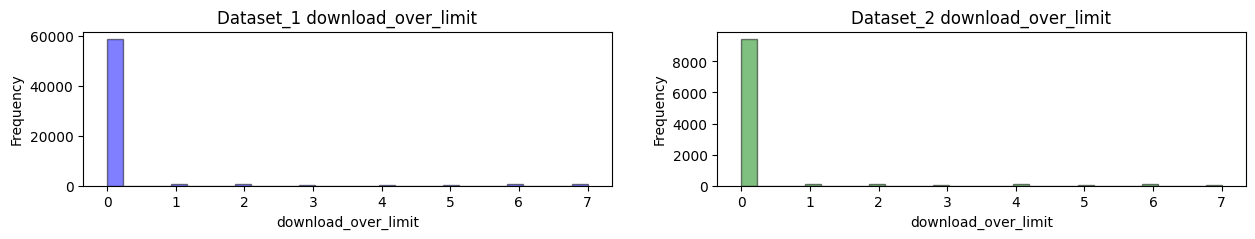

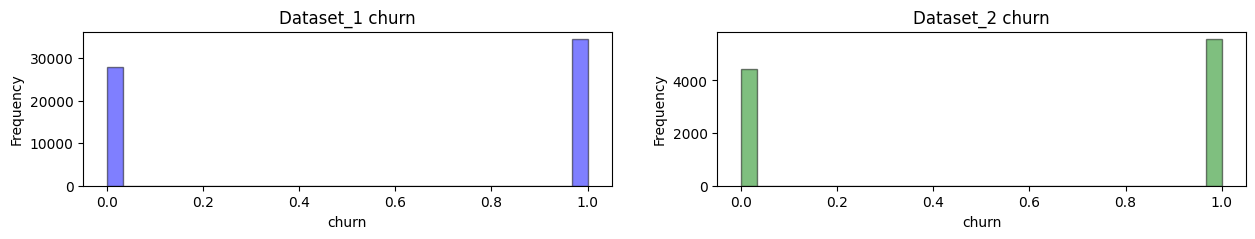

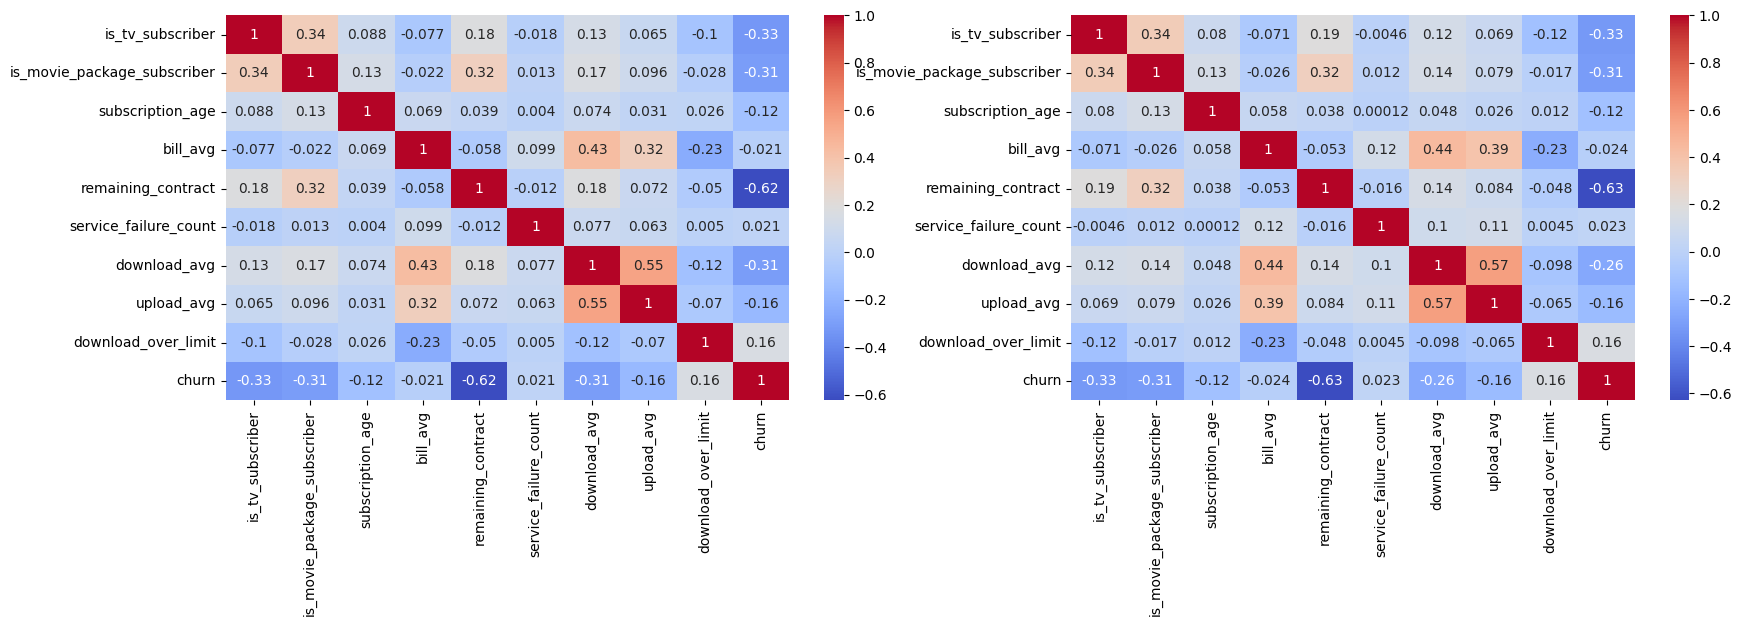

       is_tv_subscriber  is_movie_package_subscriber  subscription_age  \
count      62274.000000                 62274.000000      62274.000000   
mean           0.815605                     0.333719          2.449214   
std            0.387809                     0.471544          2.032096   
min            0.000000                     0.000000         -0.020000   
25%            1.000000                     0.000000          0.930000   
50%            1.000000                     0.000000          1.980000   
75%            1.000000                     1.000000          3.290000   
max            1.000000                     1.000000         12.440000   

           bill_avg  remaining_contract  service_failure_count  download_avg  \
count  62274.000000        43649.000000           62274.000000  61953.000000   
mean      18.951489            0.716895               0.273405     43.793569   
std       13.166029            0.696876               0.815273     61.634034   
min        0.

In [ ]:
visual_comparison(train_samples, secret_samples) # Porównanie histogramów i korelacji dla startowych podzbiorów

In [ ]:
ss_cor_arr, ss_sta_arr = create_corr_and_stats_arrays(secret_samples)
tr_cor_arr, tr_sta_arr = create_corr_and_stats_arrays(train_samples)

In [ ]:
secret_error1 = error_fun1(tr_cor_arr, tr_sta_arr, ss_cor_arr, ss_sta_arr)
secret_error2 = error_fun2(tr_cor_arr, tr_sta_arr, ss_cor_arr, ss_sta_arr)
secret_error3 = error_fun3(tr_cor_arr, tr_sta_arr, ss_cor_arr, ss_sta_arr)
#obliczenie błędu dla próbki startowej

print(f"Initial error1 (cor) = {secret_error1} \nInitial error2 (sta) = {secret_error2} \nInitial error3 (cor_churn) = {secret_error3} ")

Initial error1 (cor) = 0.03208213588209717 
Initial error2 (sta) = 43.29592329272194 
Initial error3 (cor_churn) = 0.0024679203257237095 


In [ ]:
# Optymalizacja Monte Carlo K kroków -  tą komórkę można uruchamiać ponownie, jeśli wyniki nie są satysfakcjonujące

K = 15000

for i in range(K):
  new_samples_idx = random.sample(population = range(N), k=n)
  new_samples = df.loc[new_samples_idx]
  new_train_samples = df.drop(new_samples_idx)
  ss_cor_arr, ss_sta_arr = create_corr_and_stats_arrays(new_samples)
  tr_cor_arr, tr_sta_arr = create_corr_and_stats_arrays(new_train_samples)
  #new_error = error_fun(tr_cor_arr, tr_sta_arr, ss_cor_arr, ss_sta_arr)
  new_error1 = error_fun1(tr_cor_arr, tr_sta_arr, ss_cor_arr, ss_sta_arr)
  new_error2 = error_fun2(tr_cor_arr, tr_sta_arr, ss_cor_arr, ss_sta_arr)
  new_error3 = error_fun3(tr_cor_arr, tr_sta_arr, ss_cor_arr, ss_sta_arr)




  if (new_error1 < secret_error1) and (new_error2 < secret_error2) and (new_error3 < secret_error3):
    secret_samples_idx = new_samples_idx
    secret_error1 = new_error1
    secret_error2 = new_error2
    secret_error3 = new_error3
    secret_samples = new_samples
    train_samples = new_train_samples
    print(f" K = {K}\nError1 (cor) = {secret_error1} \nError2 (sta) = {secret_error2} \nError3 (cor_churn) = {secret_error3} \n\n\n")


print(f" Error1 (cor) = {secret_error1} \nError2 (sta) = {secret_error2} \nError3 (cor_churn) = {secret_error3} ")

 Error1 (cor) = 0.010174233349973307 
Error2 (sta) = 0.008936224568955414 
Error3 (cor_churn) = 0.000345096309355575 


 Error1 (cor) = 0.010174233349973307 
Error2 (sta) = 0.008936224568955414 
Error3 (cor_churn) = 0.000345096309355575 


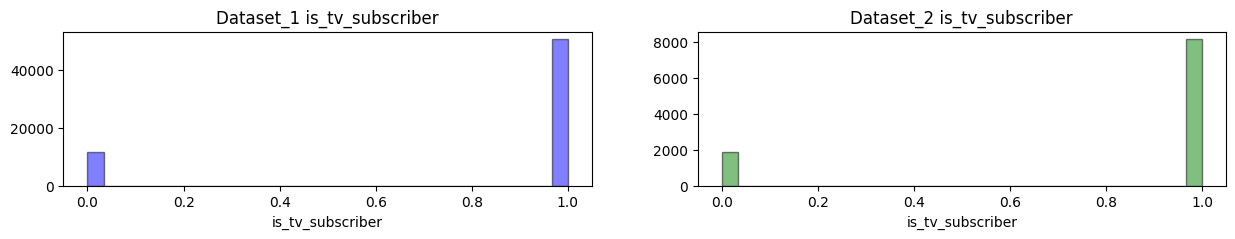

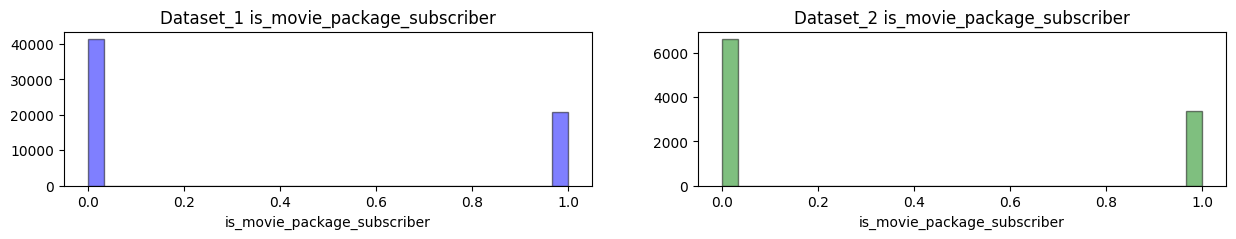

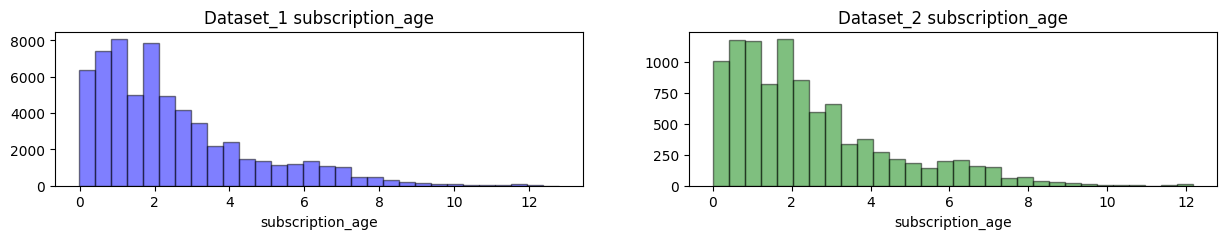

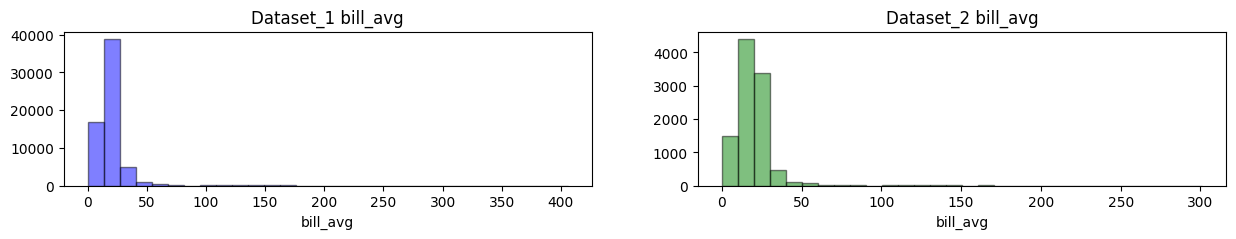

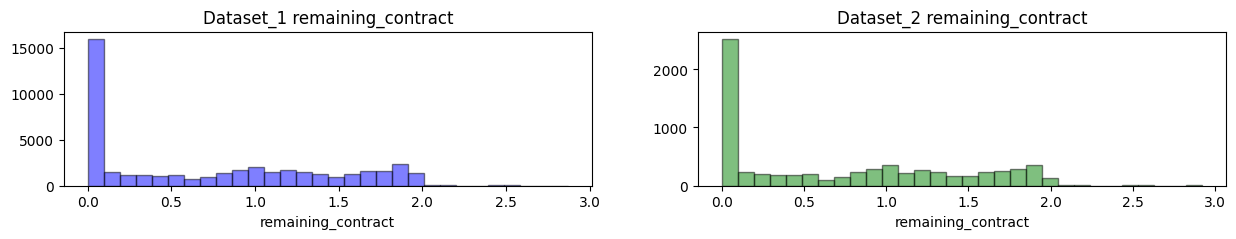

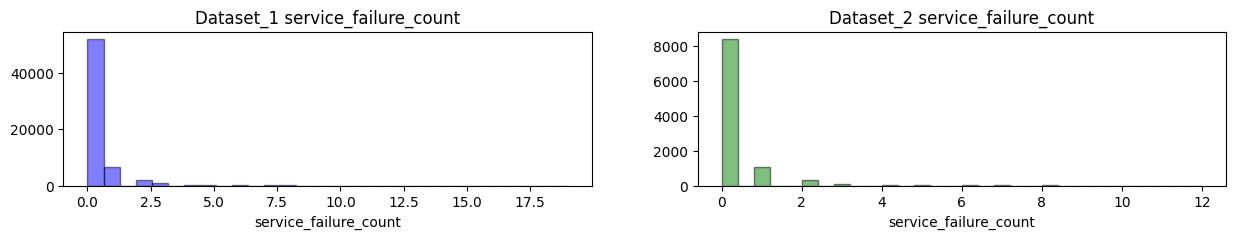

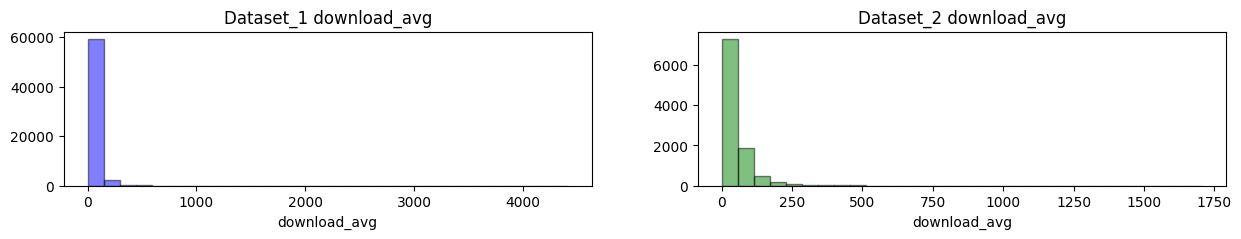

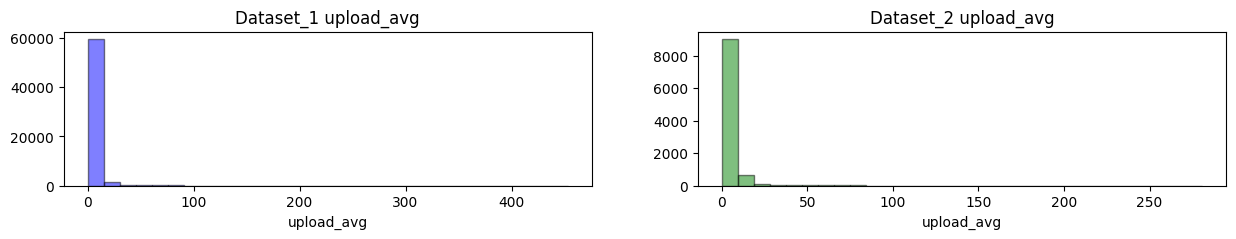

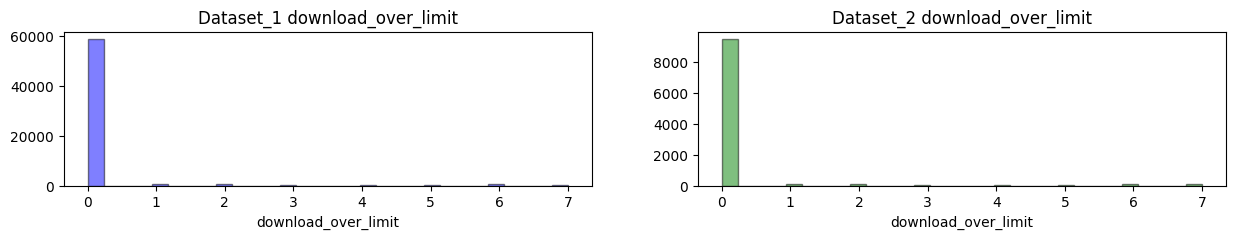

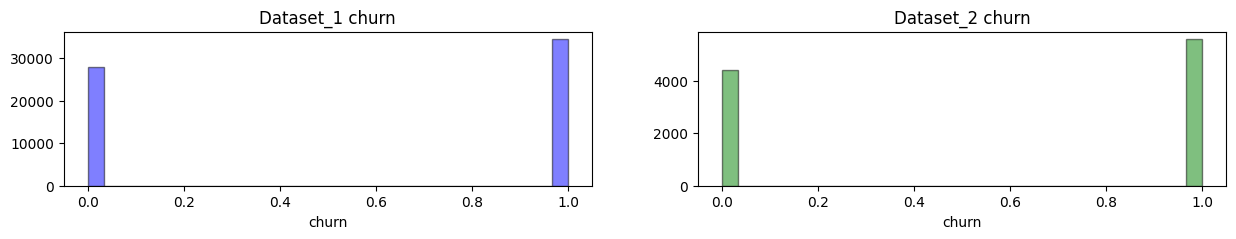

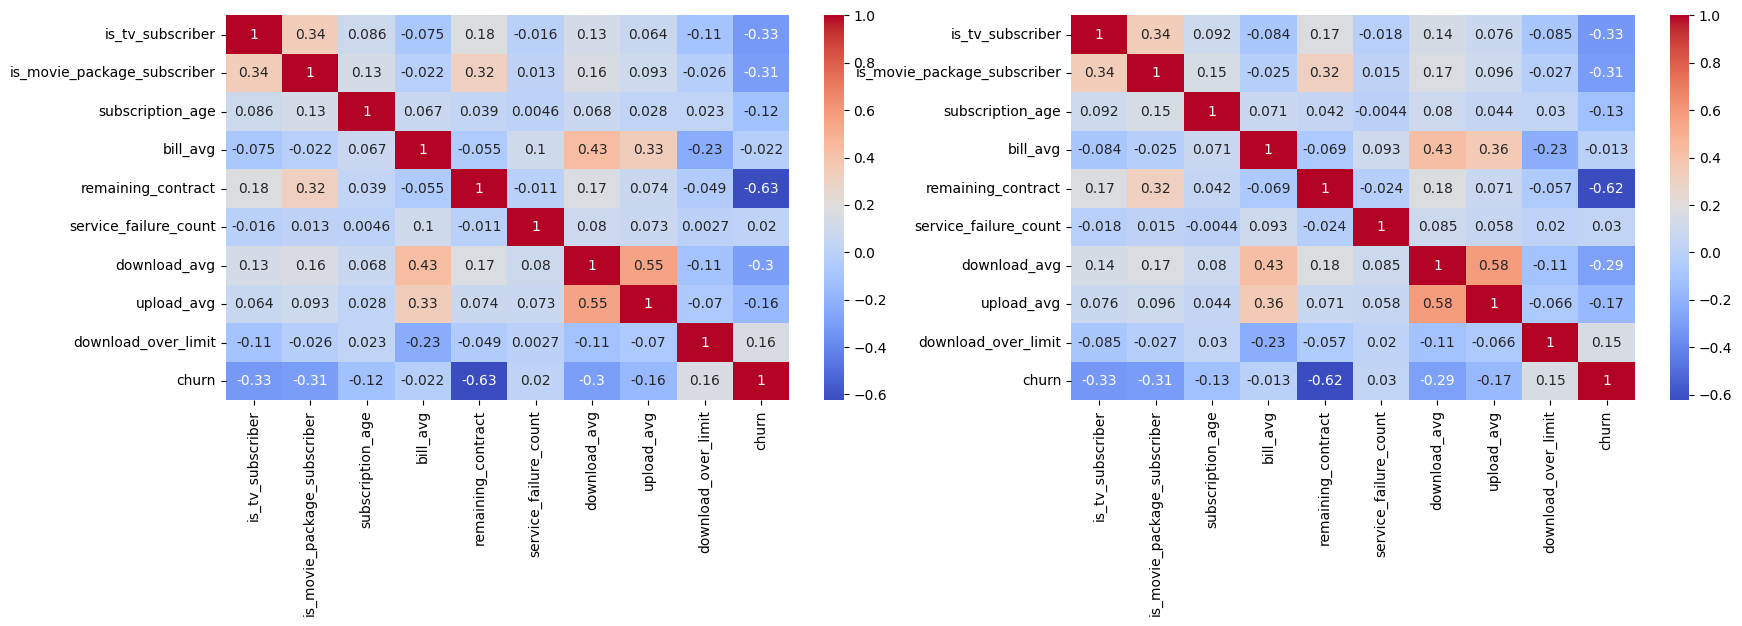

       is_tv_subscriber  is_movie_package_subscriber  subscription_age  \
count      62274.000000                 62274.000000      62274.000000   
mean           0.815220                     0.334361          2.452998   
std            0.388122                     0.471770          2.039713   
min            0.000000                     0.000000         -0.020000   
25%            1.000000                     0.000000          0.930000   
50%            1.000000                     0.000000          1.980000   
75%            1.000000                     1.000000          3.300000   
max            1.000000                     1.000000         12.800000   

           bill_avg  remaining_contract  service_failure_count  download_avg  \
count  62274.000000        43716.000000           62274.000000  61943.000000   
mean      18.950991            0.715816               0.275235     43.670008   
std       13.235181            0.697050               0.819472     63.396065   
min        0.

In [ ]:

print(f" Error1 (cor) = {secret_error1} \nError2 (sta) = {secret_error2} \nError3 (cor_churn) = {secret_error3} ")
visual_comparison(train_samples, secret_samples) # Porównanie histogramów i korelacji dla uzyskanych podzbiorów treningowego i testowego (sekretnego)

print(f" Error1 (cor) = {secret_error1} \nError2 (sta) = {secret_error2} \nError3 (cor_churn) = {secret_error3} ")


Na powyższych wykresach zwracamy uwagę na to, czy poszczególne rozkłady są podobne, zwłaszcza w przypadku cech, które są najsilniej skorelowane z "churn". Patrzymy też na zasięg histogramów. Wykresy po prawej stronie powinny mieć zasięg na osi x nie większy niż odpowiednie po lewej. To powinno przełożyć się na niewystępowanie outlayerów w datasecie testowym, jeżeli nie ma ich w treningowym. Porównujemy też "heatmapy" korelacji.

Sprawdzenie ile w tajnych próbkach jest próbek mających NaN jako wartość cechy "remaining_contract"

In [ ]:
rc = "remaining_contract"

In [ ]:
bool_vec = secret_samples[rc] == 0
ss_with_rc_0 = create_subdf(secret_samples, bool_vec)

(2249, 10)
       is_tv_subscriber  is_movie_package_subscriber  subscription_age  \
33182                 1                            0              1.95   
34703                 1                            0              0.67   
34546                 1                            0              1.36   
42831                 1                            0              0.68   
15854                 1                            0              1.78   

       bill_avg  remaining_contract  service_failure_count  download_avg  \
33182        30                 0.0                      0           0.0   
34703        11                 0.0                      0         161.0   
34546        19                 0.0                      0           7.3   
42831        10                 0.0                      0           9.8   
15854        16                 0.0                      0           0.0   

       upload_avg  download_over_limit  churn  
33182         0.0                    0 

In [ ]:
bool_vec = secret_samples[rc] > 0
ss_with_rc_gt_0 = create_subdf(secret_samples, bool_vec)

(4737, 10)
       is_tv_subscriber  is_movie_package_subscriber  subscription_age  \
53859                 1                            0              1.94   
7988                  1                            1              7.29   
28148                 1                            0              5.11   
46301                 1                            1              2.58   
60599                 1                            0              1.00   

       bill_avg  remaining_contract  service_failure_count  download_avg  \
53859         2                0.04                      0          12.2   
7988         17                1.68                      0          54.2   
28148        21                0.38                      0          32.3   
46301        12                0.55                      0          39.5   
60599        20                0.97                      0          26.3   

       upload_avg  download_over_limit  churn  
53859         0.6                    0 

In [ ]:
bool_vec = secret_samples[rc].isna()
ss_with_rc_NaN = create_subdf(secret_samples, bool_vec)

(3014, 10)
       is_tv_subscriber  is_movie_package_subscriber  subscription_age  \
30769                 1                            0              0.97   
13892                 0                            0              2.42   
17656                 0                            0              2.06   
8582                  1                            0              5.75   
10740                 1                            1              2.82   

       bill_avg  remaining_contract  service_failure_count  download_avg  \
30769        39                 NaN                      0          76.6   
13892         0                 NaN                      0           8.5   
17656        20                 NaN                      0           3.9   
8582         24                 NaN                      0          51.9   
10740         0                 NaN                      0          25.0   

       upload_avg  download_over_limit  churn  
30769         5.1                    0 

In [ ]:
secret_isc = secret_samples
new_isc = train_samples

new_isc.head()

print(df.shape) # tu powinno być N = 72274 , bo to pierwotny zbiór
print(secret_isc.shape) #tu powinno być n, bo to liczba próbek, które idą do tajnego zbioru
print(new_isc.shape) #to jest zbiór pozostałych próbek, czyli do zbiór, na którym będziemy pracować, powinno być N - n

assert secret_isc.shape[0]+new_isc.shape[0] == df.shape[0]



(72274, 10)
(10000, 10)
(62274, 10)


In [ ]:
filepath_new_isc= "/content/new_isc.csv"
filepath_secret_isc= "/content/secret_isc.csv"

In [ ]:
secret_isc.to_csv(filepath_secret_isc, index=False)
new_isc.to_csv(filepath_new_isc, index=False)

Od poniższej instrukcji powinny zaczynać się teraz nasze osobne notatniki. To jest wersja z usuniętym tylko id. Można usunąć jeszcze te dwie kolumny o niskiej korelacji z churnem albo można ich nie usuwać albo zrobić dwa warianty.

In [ ]:
new_isc_from_file = pd.read_csv("new_isc.csv")
print(new_isc_from_file.head())
print(new_isc_from_file.shape)

   is_tv_subscriber  is_movie_package_subscriber  subscription_age  bill_avg  \
0                 1                            0             11.95        25   
1                 0                            0              8.22         0   
2                 1                            0              8.91        16   
3                 0                            0              6.87        21   
4                 0                            0              6.39         0   

   remaining_contract  service_failure_count  download_avg  upload_avg  \
0                0.14                      0           8.4         2.3   
1                 NaN                      0           0.0         0.0   
2                0.00                      0          13.7         0.9   
3                 NaN                      1           0.0         0.0   
4                 NaN                      0           0.0         0.0   

   download_over_limit  churn  
0                    0      0  
1         